In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LassoCV,RidgeCV,ElasticNetCV

In [378]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [379]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [380]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [381]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

# Data Cleaning

In [382]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [383]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [384]:
df.loc[:122,'region']=0
df.loc[122:,'region']=1


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [386]:
df[['region']]=df[['region']].astype(int)

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [388]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
region         0
dtype: int64

In [389]:
df=df.dropna()

In [390]:
df=df.drop(123)

In [391]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [392]:
df.columns=df.columns.str.strip()

In [393]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [394]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 29.4+ KB


## Change the required columns datatypes

In [395]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [396]:
df['Temperature'].value_counts()

Temperature
35    29
31    25
34    24
33    23
30    22
32    21
36    21
29    18
28    15
27     8
37     8
25     6
39     6
26     5
24     3
38     3
40     3
22     2
42     1
Name: count, dtype: int64

In [397]:
df['month']=df['month'].apply(lambda x:x[1])

In [398]:
df[['Temperature','RH','Ws']]=df[['Temperature','RH','Ws']].astype(int)

## Changin the other columns to float

In [399]:
for column in df.columns:
    if df[column].dtype=='object':
        
        try: df[column]=df[column].astype(float)
        except:pass

In [400]:
df_copy=pd.read_csv("cleaned_algerian_data.csv")

In [401]:
df_copy=df_copy.drop(['day','year','month','Unnamed: 0'],axis=1)

In [402]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [403]:
df_copy.dtypes

Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
region           int64
dtype: object

In [404]:
df_copy['Classes']=df_copy['Classes'].str.strip()

In [405]:
df_copy['Classes']=np.where(df_copy['Classes']=='not fire',0,1)

In [406]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

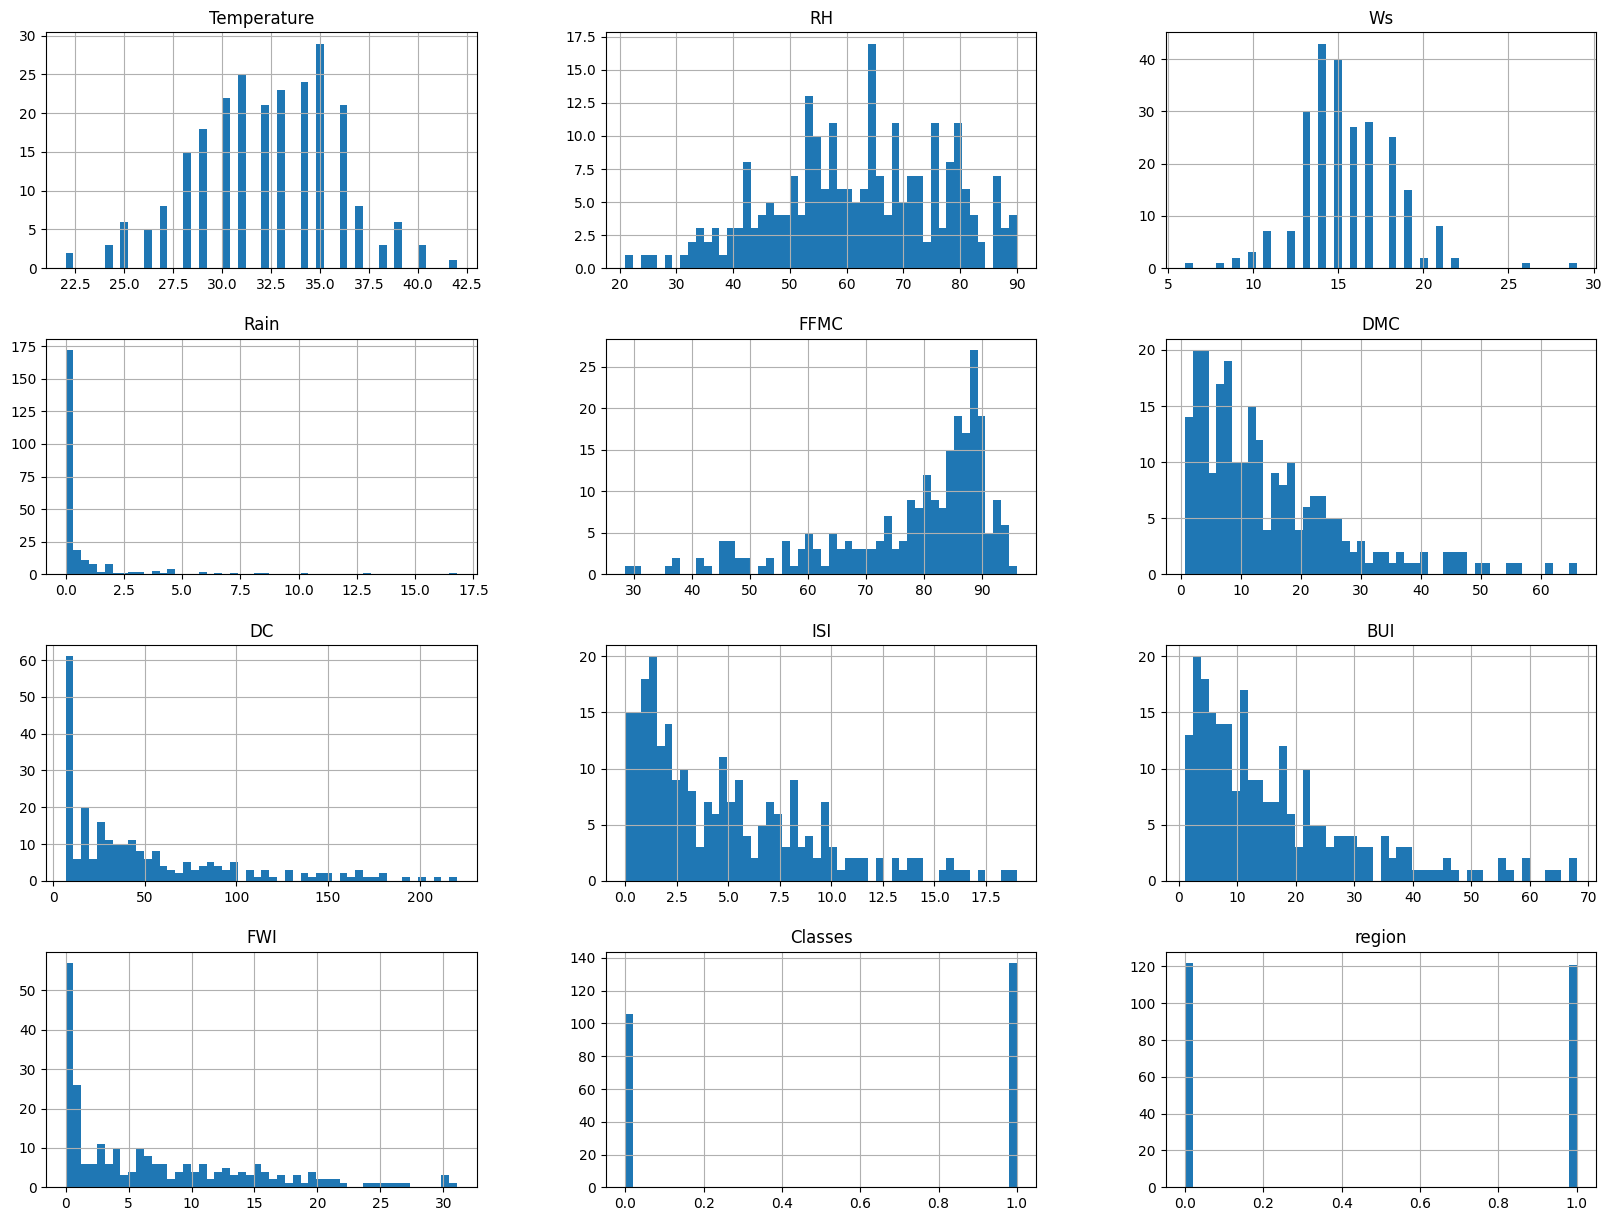

In [407]:

df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [408]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Pie Chart of classes')

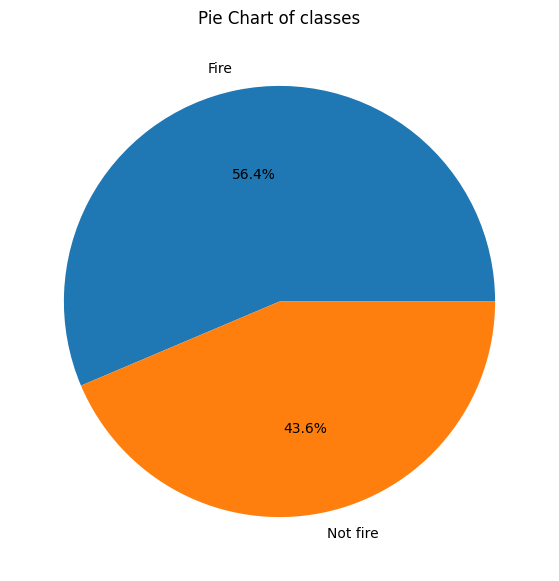

In [409]:
class_labels=['Fire','Not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=class_labels,autopct='%1.1f%%')
plt.title('Pie Chart of classes')

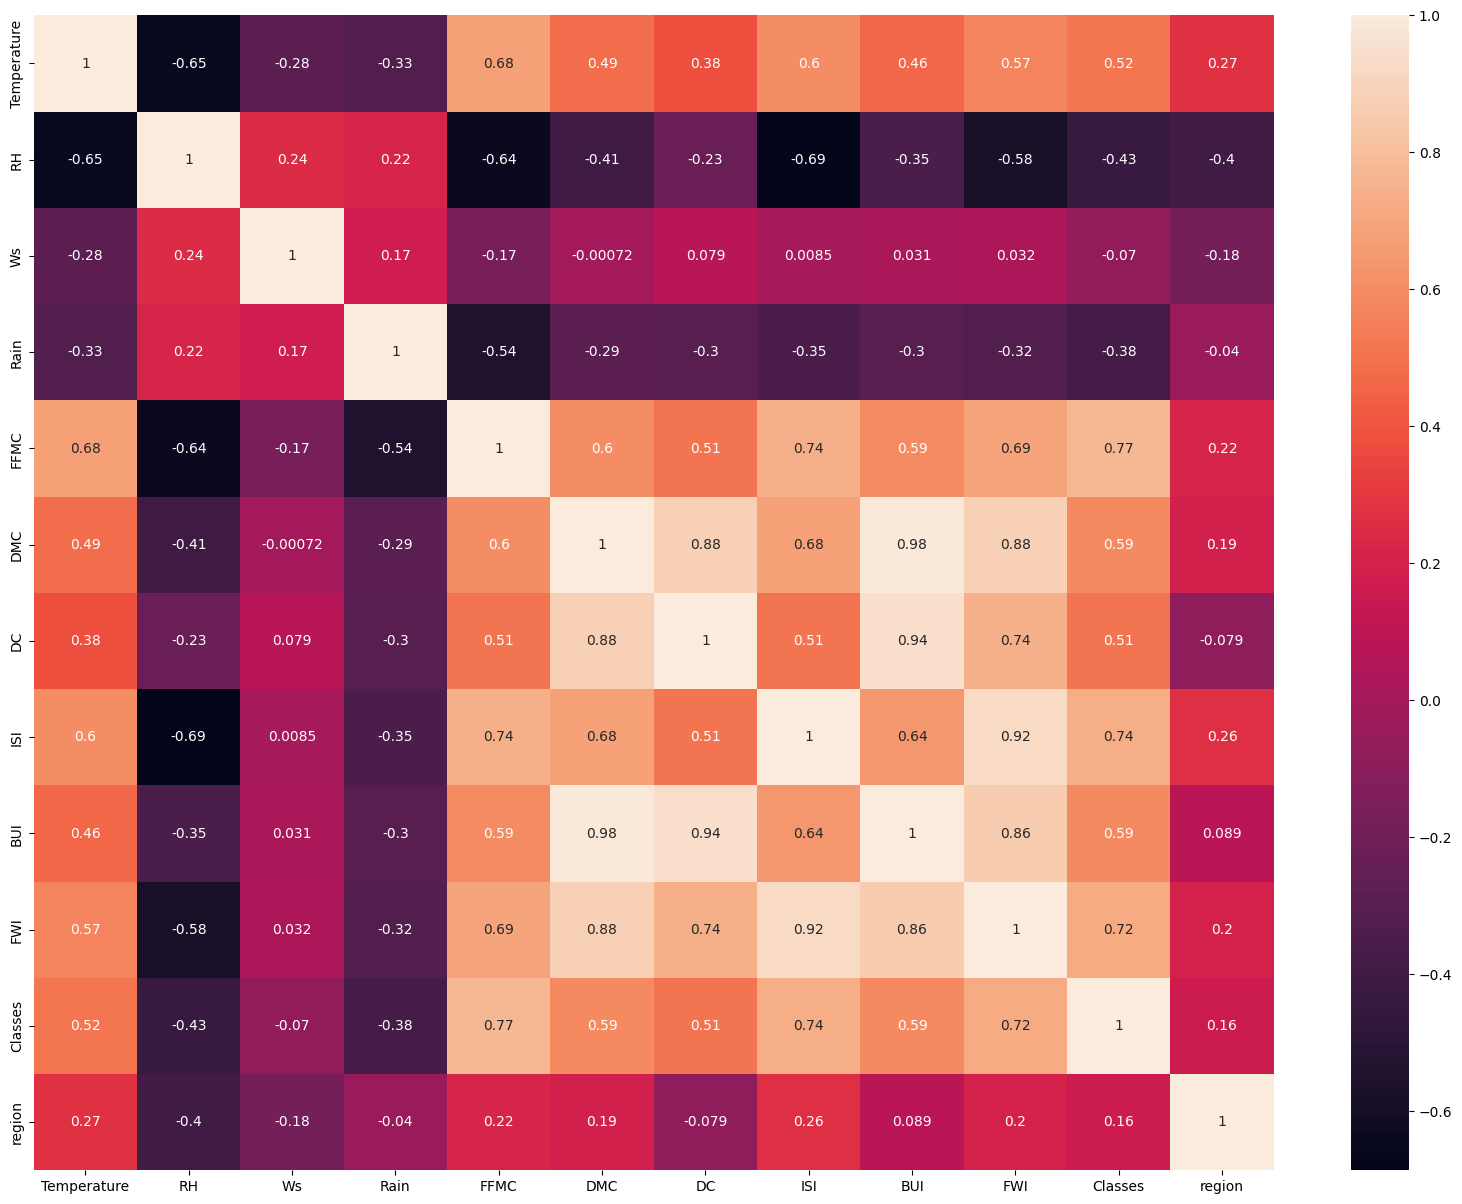

In [410]:
plt.figure(figsize=(20,15))
sns.heatmap(df_copy.corr(),annot=True)
plt.show()

## Box Plots

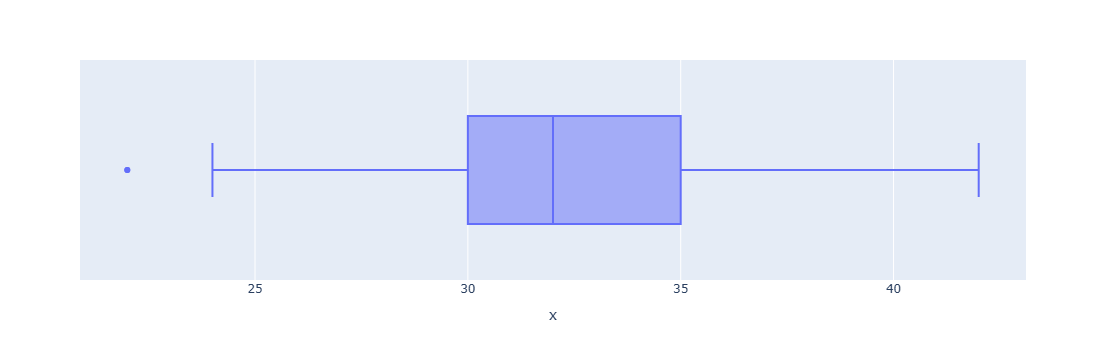

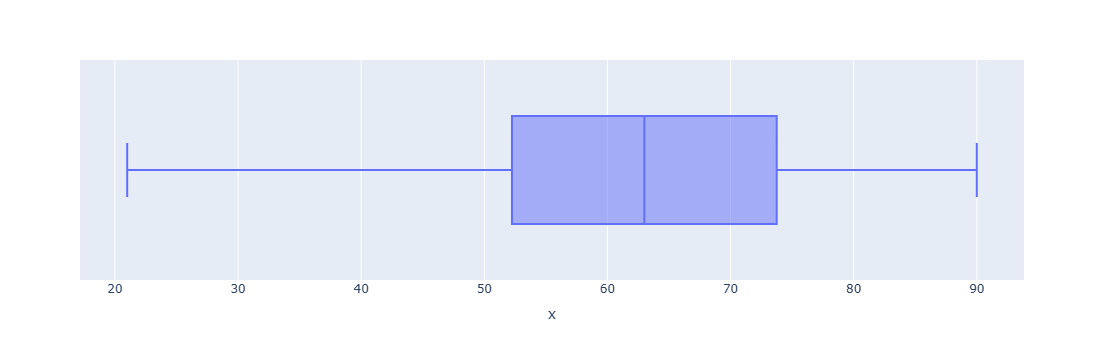

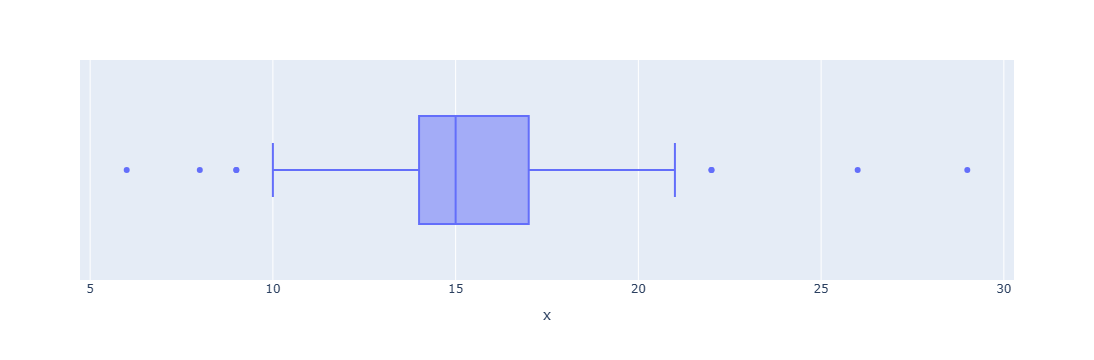

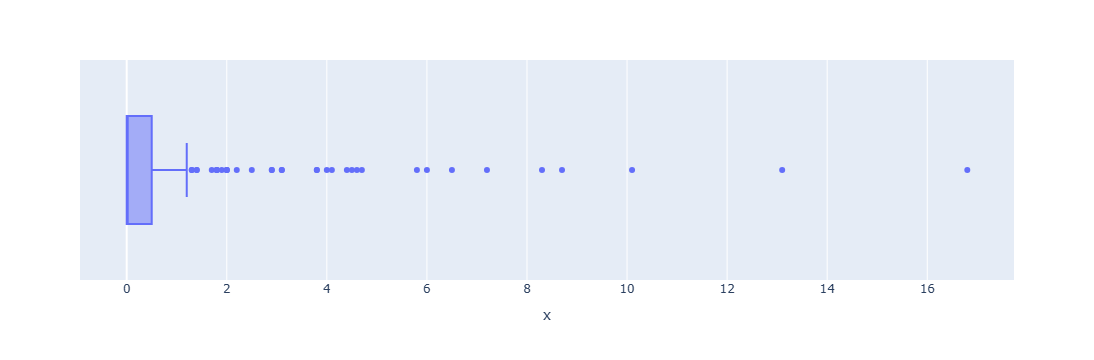

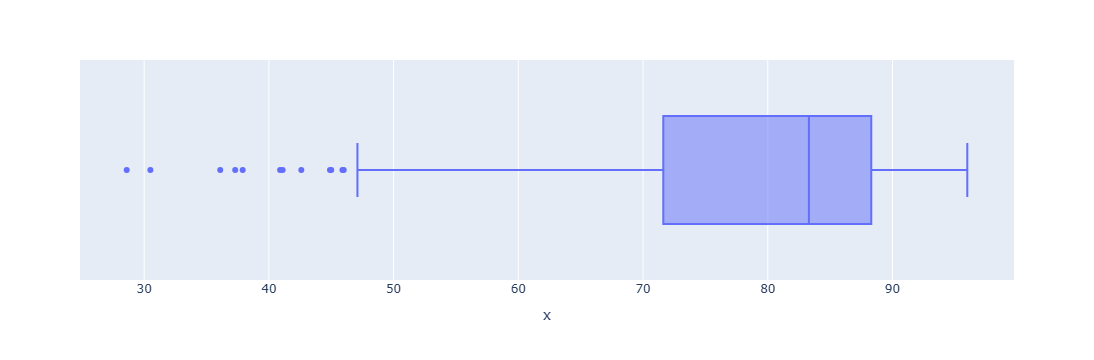

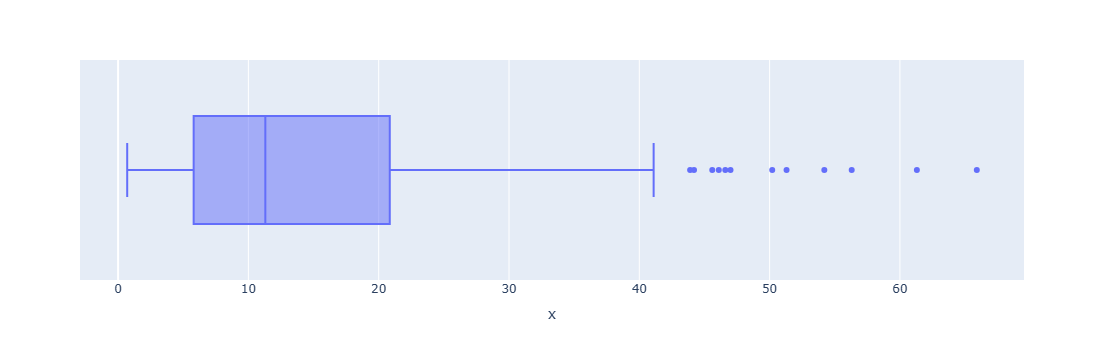

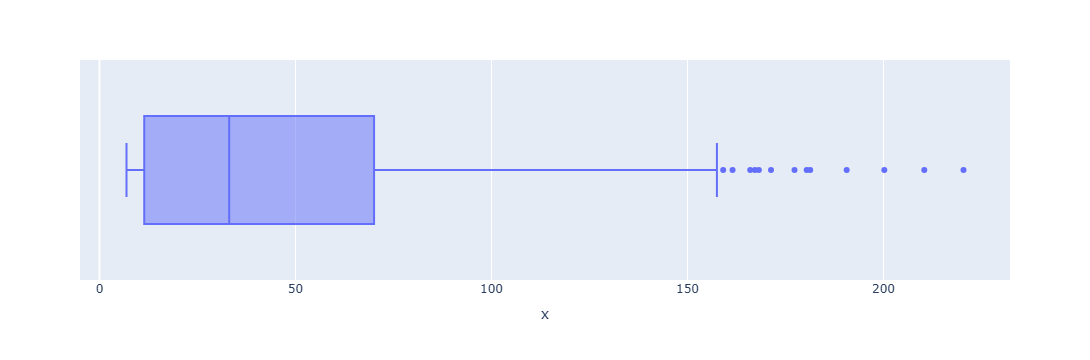

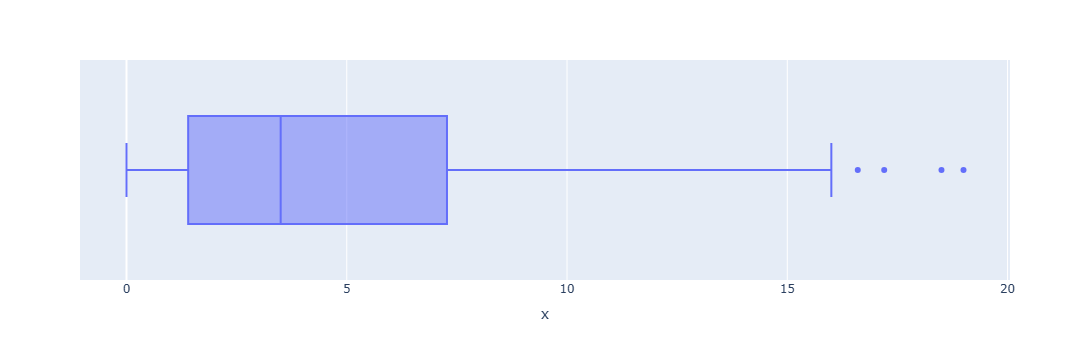

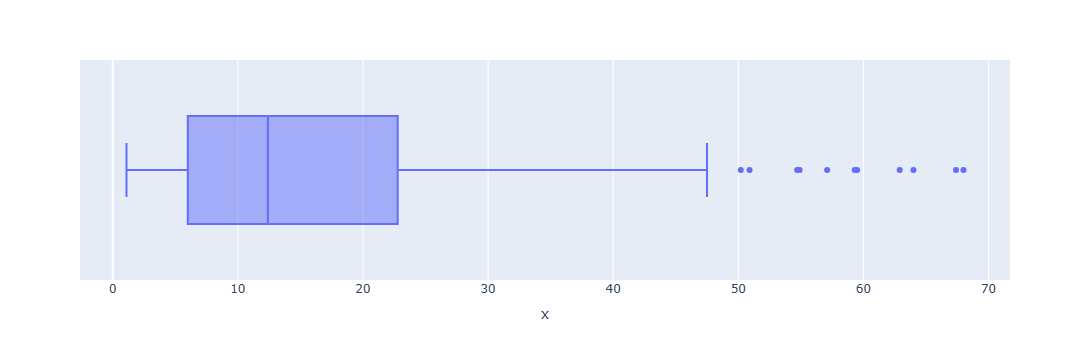

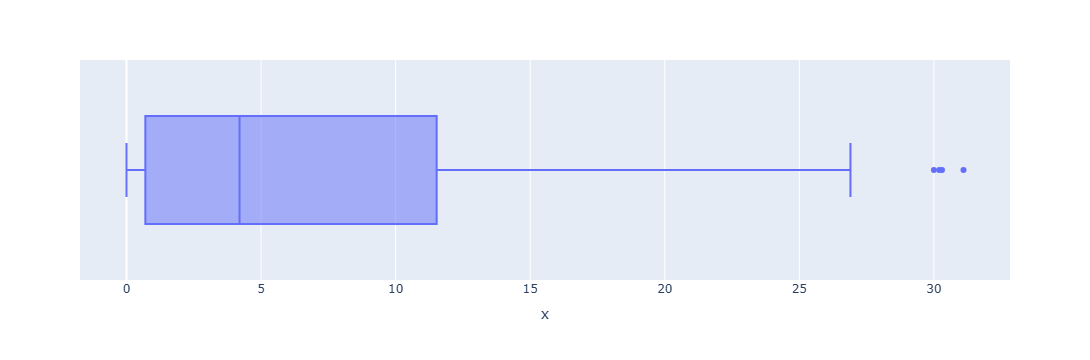

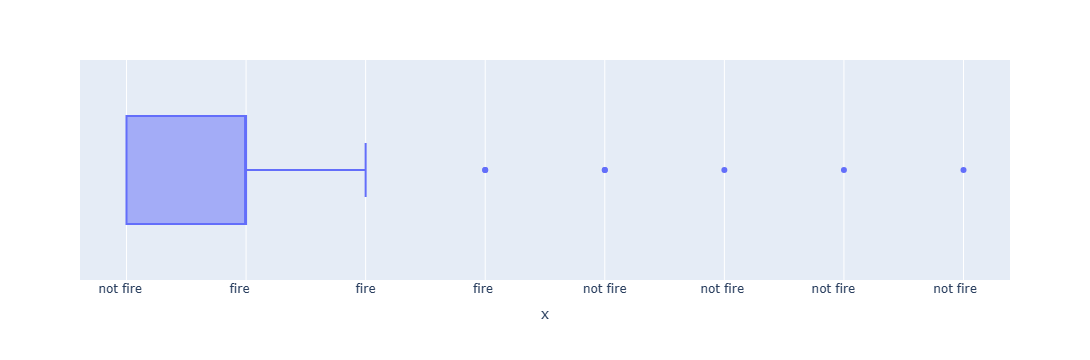

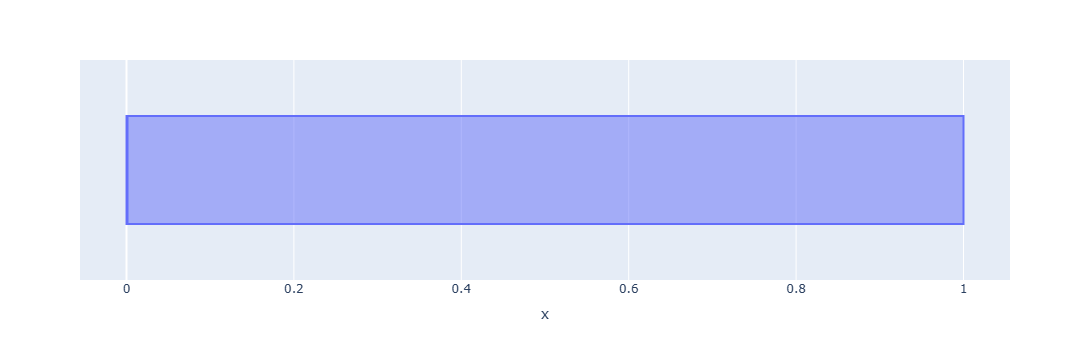

In [411]:
for column in df_copy.columns:
    fig=px.box(x=df[column])
    fig.show()

In [412]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [414]:
df['Classes']=df['Classes'].str.strip()
df["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [415]:
df['Classes']=np.where(df['Classes']=='not fire',0,1)

Text(0.5, 1.0, 'Fire analysis of Sidi - Bel region')

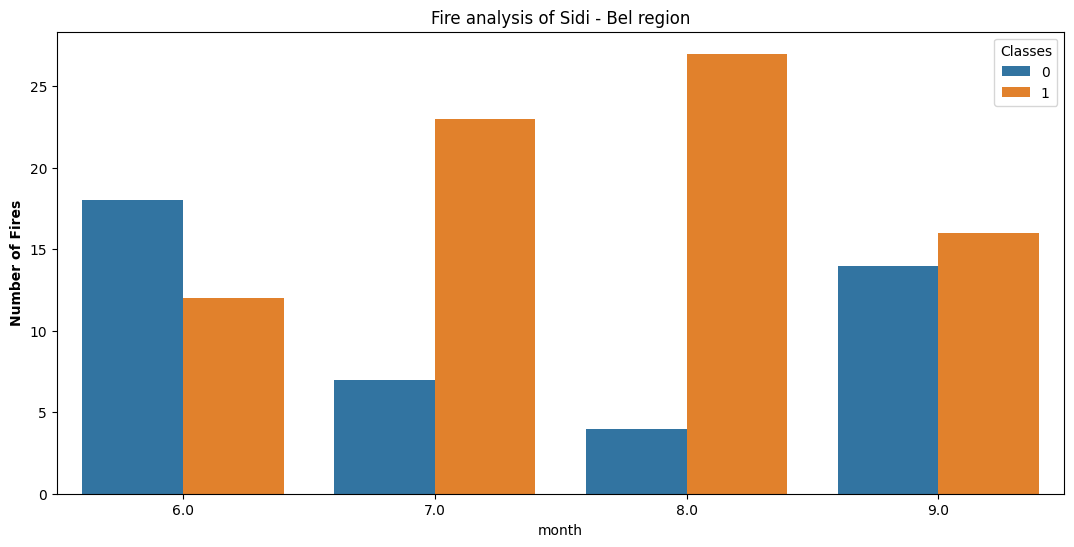

In [416]:
dftemp=df.loc[df['region']==1]
plt.subplots(figsize=(13,6))
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.title("Fire analysis of Sidi - Bel region")

Text(0.5, 1.0, 'Fire analysis of bejaia region')

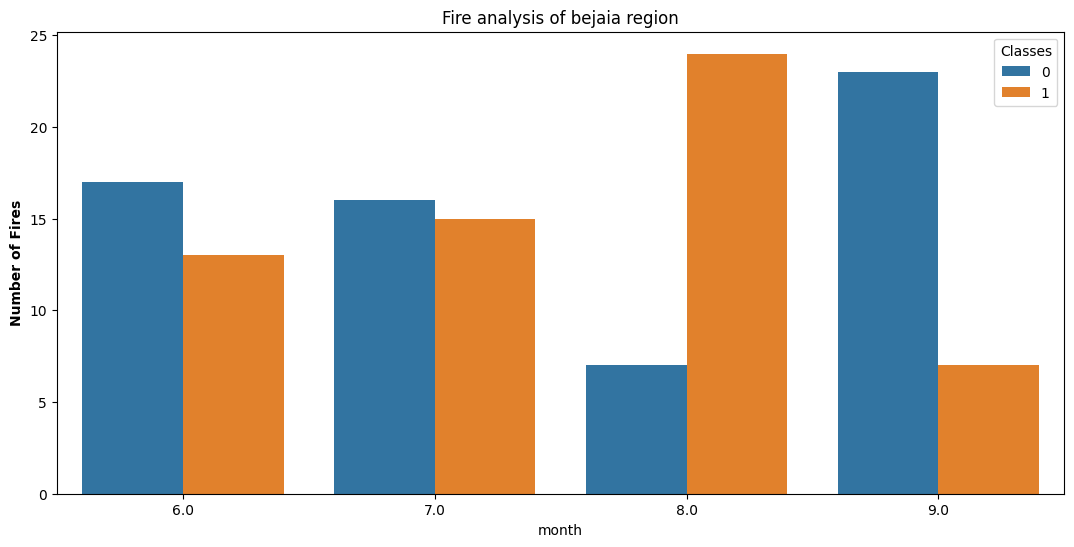

In [417]:
dftemp=df.loc[df['region']==0]
plt.subplots(figsize=(13,6))
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.title("Fire analysis of bejaia region")

In [437]:
x=df_copy.drop(columns=['FWI'])
y=df_copy['FWI']
x


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [438]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [439]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

<Axes: >

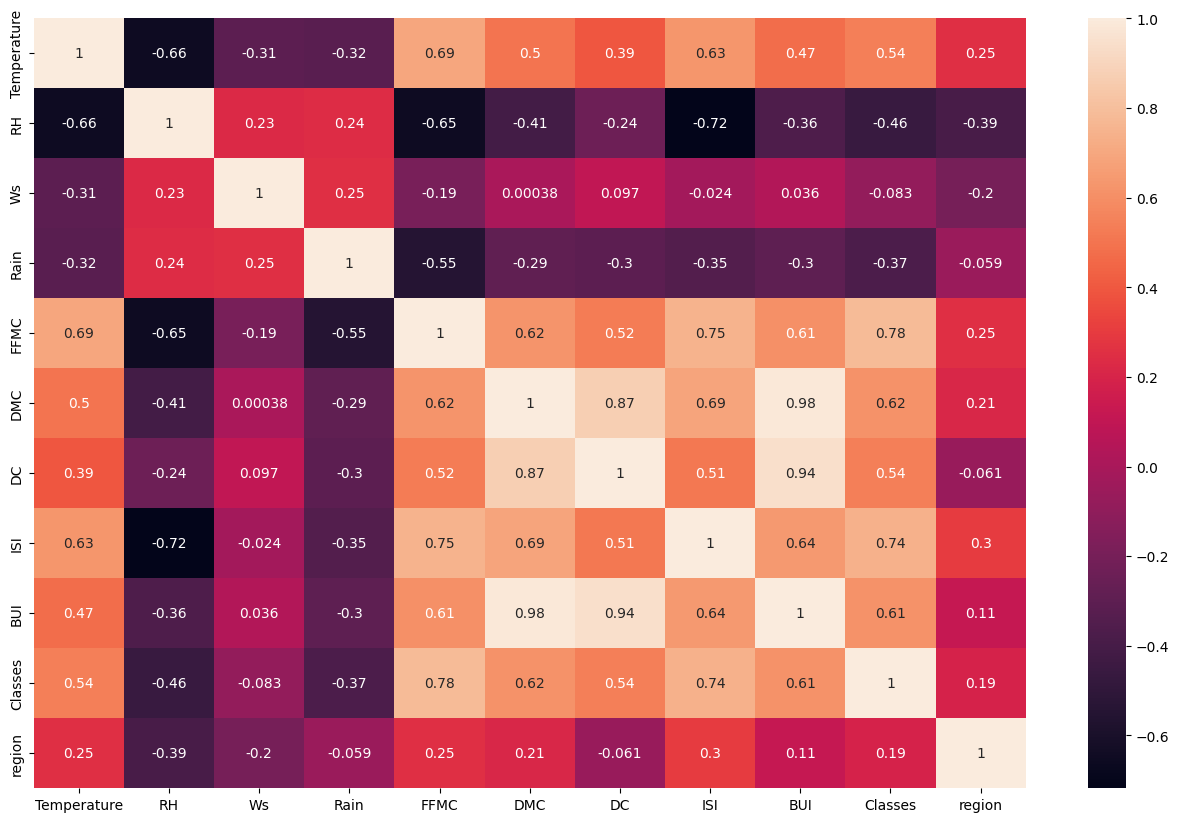

In [440]:
plt.figure(figsize=(16,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [422]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [441]:
corr_features=correlation(x_train,0.85)
corr_features

{'BUI', 'DC'}

In [442]:
x_test.drop(corr_features,axis=1,inplace=True)
x_train.drop(corr_features,axis=1,inplace=True)

In [443]:
ss=StandardScaler()

In [444]:
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

Text(0.5, 1.0, 'Before scalling')

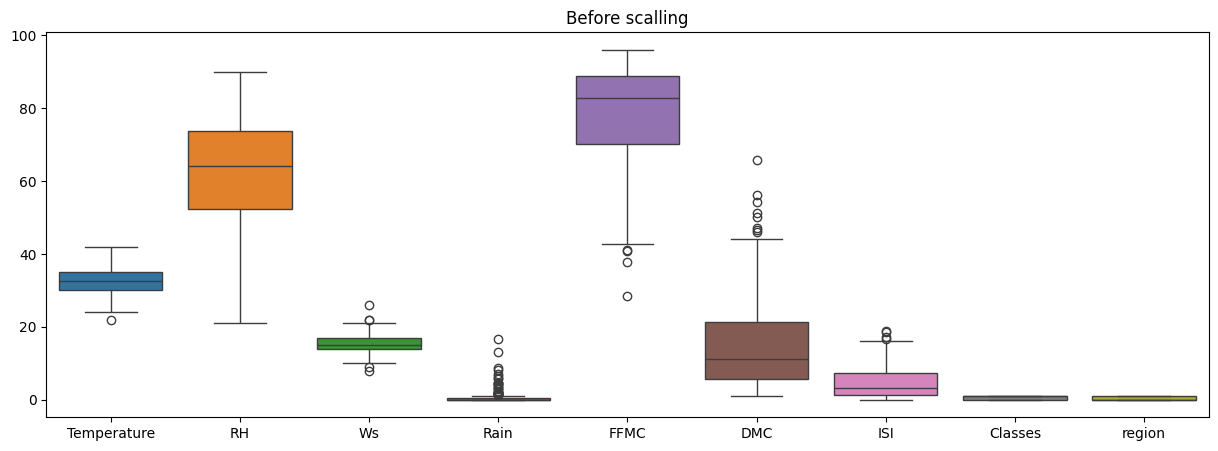

In [445]:
plt.subplots(figsize=(15,5))

sns.boxplot(data=x_train)
plt.title('Before scalling')


# Linear Regression

In [446]:
model1=LinearRegression()
model1.fit(x_train_scaled,y_train)

LinearRegression()

score : 0.9847657384266951
mae : 0.5468236465249978


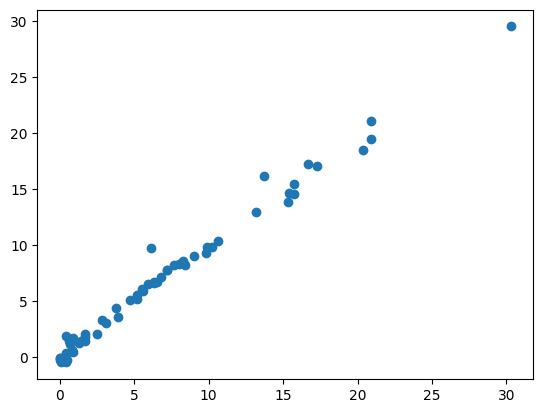

In [454]:
y_pred=model1.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'score : {score}')
print(f'mae : {mae}')
plt.scatter(y_test,y_pred)

score : 0.9492020263112388
mae : 1.133175994914409


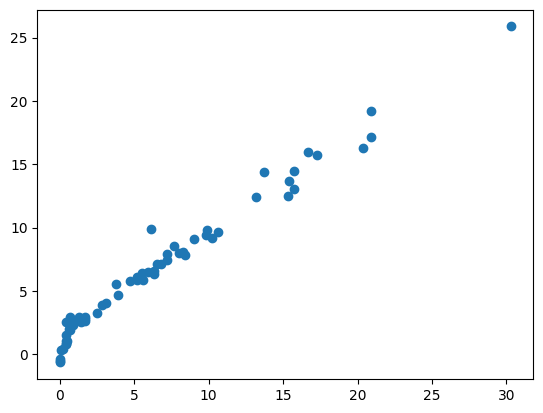

In [453]:
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'score : {score}')
print(f'mae : {mae}')
plt.scatter(y_test,y_pred)

score : 0.9842993364555513
mae : 0.56423053401057


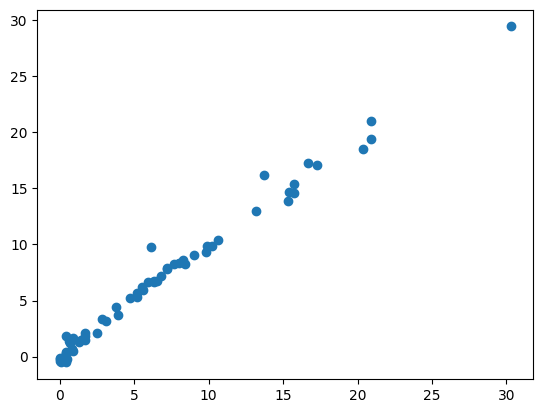

In [456]:
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'score : {score}')
print(f'mae : {mae}')
plt.scatter(y_test,y_pred)

score : 0.8753460589519703
mae : 1.8822353634896


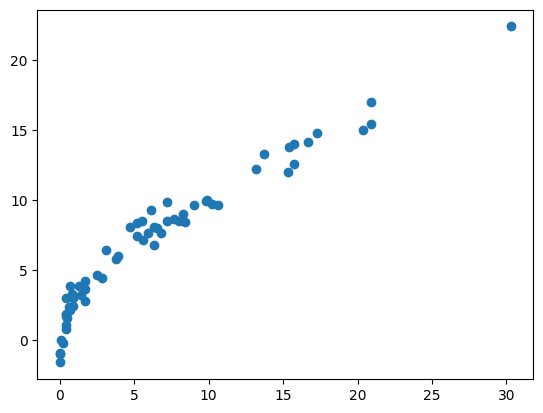

In [458]:
EN=ElasticNet()
EN.fit(x_train_scaled,y_train)
y_pred=EN.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'score : {score}')
print(f'mae : {mae}')
plt.scatter(y_test,y_pred)

In [462]:
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [463]:
lassocv.alpha_

0.05725391318234408

In [464]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

score : 0.9820946715928275
mae : 0.6199701158263432


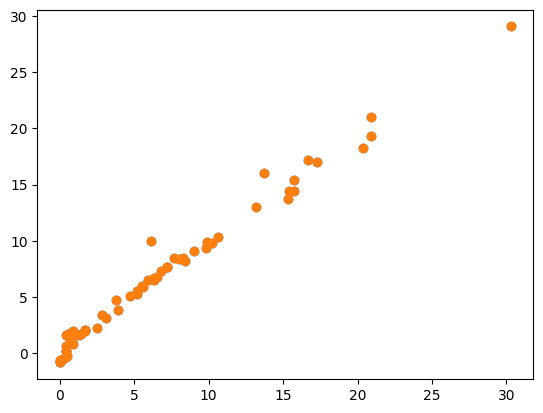

In [466]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'score : {score}')
print(f'mae : {mae}')
plt.scatter(y_test,y_pred)

score : 0.9842993364555513
mae : 0.56423053401057


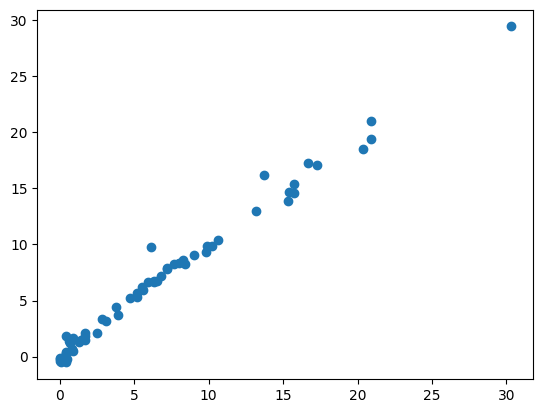

In [470]:
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'score : {score}')
print(f'mae : {mae}')
plt.scatter(y_test,y_pred)

In [473]:
ridgecv.alphas


(0.1, 1.0, 10.0)

In [474]:
ridgecv.get_params

<bound method BaseEstimator.get_params of RidgeCV(cv=5)>

score : 0.9814217587854942
mae : 0.6575946731430897


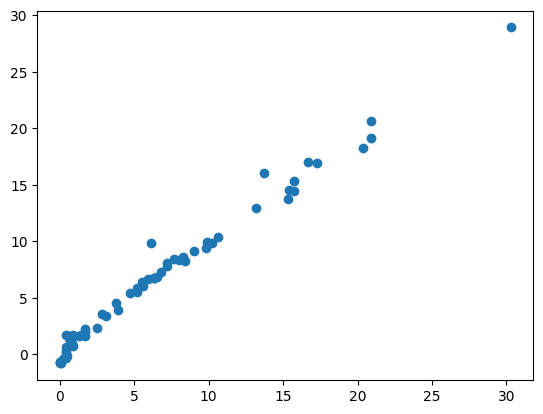

In [478]:
ENcv=ElasticNetCV(cv=5)
ENcv.fit(x_train_scaled,y_train)
y_pred=ENcv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'score : {score}')
print(f'mae : {mae}')
plt.scatter(y_test,y_pred)

In [479]:
ENcv.alpha_

0.04311146156383891